(created by Zsolt Elter)

# Numerical solution of the one-group diffusion equation

In realistic reactor calculations the analytical solution of the diffusion equation is usually not possible (for example due to the heterogenities in the reactor, such as fuel pellets, cladding, moderator channels, etc).

Thus the solution often requires numerical treatment. In this notebook we will explore a simple case, a homogenous slab reactor: for such system both analytical and numerical solution is possible, and can be compared.

Suppose we would like to solve 

$$-D\frac{d^2\phi}{dx^2}+\Sigma_a\phi(x)=S(x)$$

with boundary conditions

$$\phi(0)=\phi(a)=0$$

(let's ignore now the extrapolation length).

We can discretize the the spatial variable $x$ by choosing a set of $N+1$ discrete points ($x_0,x_1,...,x_i,...x_N$) which are equally spaced. The distance between the neigbouring points is $\Delta=a/N$.

If we wanted to rewrite the above diffusion equation at each discrete $x_i$ point, we need an approximation for the term $\frac{d^2\phi}{dx^2}$. We can Taylor expend $\phi$ at $x_{i\pm1}$:

$$\phi_{i+1}=\phi(x_{i+1})=\phi_i+\Delta\frac{d\phi}{dx}\Big\rvert_i+\frac{\Delta^2}{2}\frac{d^2\phi}{dx^2}\Big\rvert_i+...$$

and

$$\phi_{i-1}=\phi(x_{i-1})=\phi_i-\Delta\frac{d\phi}{dx}\Big\rvert_i+\frac{\Delta^2}{2}\frac{d^2\phi}{dx^2}\Big\rvert_i-...$$

Upon adding these one arrives to

$$\frac{d^2\phi}{dx^2}\Big\rvert_i\approx \frac{\phi_{i+1}-2\phi_i+\phi_{i-1}}{\Delta^2}$$

with that our diffusion equation becomes

$$-D\Bigg(\frac{\phi_{i+1}-2\phi_i+\phi_{i-1}}{\Delta^2}\Bigg)+\Sigma_a\phi_i=S_i \quad i=1,2,...$$

We can rearrange this

$$-\frac{D}{\Delta^2}\phi_{i-1}+(\frac{2D}{\Delta^2}+\Sigma_a)\phi_i-\frac{D}{\Delta^2}\phi_{i+1}=S_i$$

that is with some new constants

$$a_{i,i-1}\phi_{i-1}+a_{i,i}\phi_i-a_{i,i+1}\phi_{i+1}=S_i \quad i=1,2...,N-1$$

(we dont have equations for $i=0$ and $i=N$, since we have boundary conditions there, which actually present themself by the fact that in case of $i=1$ the $\phi_{i-1}$ disappears).

Thus we could construct a matrix $\underline{\underline{A}}$

\begin{pmatrix}
a_{1,1} & a_{1,2} & 0 & 0 & 0 & \cdots \\
a_{2,1} & a_{2,2} & a_{2,3} & 0 & 0 & \cdots \\
0 & a_{3,2} & a_{3,3} & a_{3,4} & 0 & \cdots \\
0 & 0 & a_{4,3} & a_{4,4} & a_{4,5} & \cdots  \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots &
\end{pmatrix}

with which

$\underline{\underline{A}}\underline{\phi}=\underline{S}$

where $\underline{\phi}$ and $\underline{S}$ are the vectors made of the discrete flux and source values. Thus by inverting the matrix one can solve for the flux. 

It is easy to see that such a problem could be similarly further developed by assuming that $D$ and $\Sigma_a$ also depend on the spatial coordinate. Or one could develop it for a multiplying medium.

### Task

Solve the flux for some simple cases. 

a, when the source is located in the middle of a slab

b, when the source is uniform in the whole slab

hint: you can use the np.linalg.solve function once the matrix and the vectors are constructed.



In [55]:
import numpy as np
import matplotlib.pyplot as plt
a=100
D=0.9
Sigma_a=0.066
L=np.sqrt(D/Sigma_a)
B=np.sqrt(Sigma_a/D)
N=30

### Solution

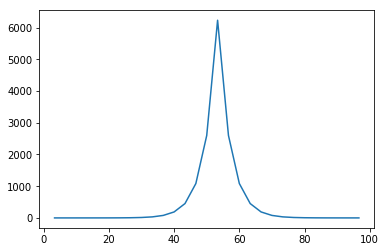

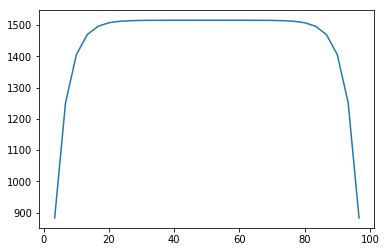

In [61]:
Delta=a/N
x=np.linspace(0,a,N+1)
A=np.zeros((N-1,N-1))
for i in range(1,N):
    if i==1:
        A[i-1][i-1]=2*D/Delta**2+Sigma_a
        A[i-1][i]=-D/Delta**2
    elif i==N-1:
        A[i-1][i-2]=-D/Delta**2
        A[i-1][i-1]=2*D/Delta**2+Sigma_a
    else:
        A[i-1][i-2]=-D/Delta**2
        A[i-1][i-1]=2*D/Delta**2+Sigma_a
        A[i-1][i]=-D/Delta**2

        
        
S=np.zeros(N-1)
S[15]=1000           #"plane" source

flux=np.linalg.solve(A,S)

plt.figure
plt.plot(x[1:-1],flux)
plt.show()

S=np.zeros(N-1)
S=100*np.ones(N-1)  #constant source everywhere

flux=np.linalg.solve(A,S)

plt.figure
plt.plot(x[1:-1],flux)
plt.show()